# Analisi dati

In [1]:
import numpy as np
import math
import sys
import random
import matplotlib.pyplot as plt

In [2]:
R=5
T1=1
T2=2
T3=3
T4=4
T5=10
T6=599

In [3]:
import pandas
df = pandas.read_csv('misure_grezze.csv')

In [4]:
conteggi_t1=df.iloc[0]
conteggi_t2=df.iloc[1]
conteggi_t3=df.iloc[2]
conteggi_t4=df.iloc[3]
conteggi_t10=df.iloc[4]
conteggi_t599=df.iloc[5]
conteggi_t1=np.array(conteggi_t1)
conteggi_t2=np.array(conteggi_t2)
conteggi_t3=np.array(conteggi_t3)
conteggi_t4=np.array(conteggi_t4)
conteggi_t10=np.array(conteggi_t10)
conteggi_t599=np.array(conteggi_t599)

In [5]:
def istogrammi_tentativi(R,T,conteggi,off,bin):
    #istogramma
    l=R*T
    mean=l
    sd=np.sqrt(l)
    plt.hist(conteggi,density=True,bins=bin)
    #funzione
    from scipy.stats import poisson
    
    p=poisson(mu=l)
    x = np.arange(l-3*int(sd),l+3*int(sd))
    plt.plot(x, p.pmf(x), 'bo', ms=4,label='poisson pmf $\lambda$={0:.1f}'.format(l))
    #media e deviazione standard
    plt.hlines(off, mean-sd, mean+sd,
           colors='black', lw=2, label='media $\pm \sigma$')
    plt.plot(mean, off, 'ro', ms=8, label='media')
    plt.title('Istogramma tentativi t={0:.1f}s'.format(T),  fontsize=16)
    plt.xlabel("x", fontsize=16)
    plt.ylabel("probabilità $P(x| P_{\lambda})$", fontsize=16)
    plt.legend( fontsize=10)
    plt.ylim(0, np.max(p.pmf(x))*2)

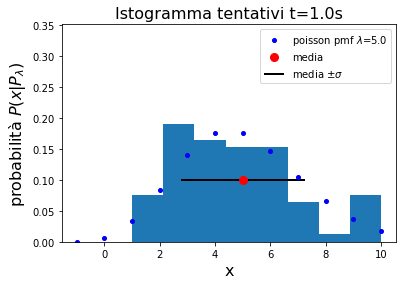

In [6]:
istogrammi_tentativi(R,T1,conteggi_t1,0.1,8)

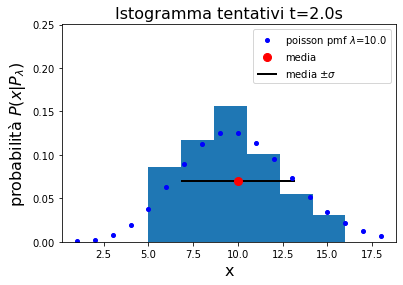

In [7]:
istogrammi_tentativi(R,T2,conteggi_t2,0.07,6)

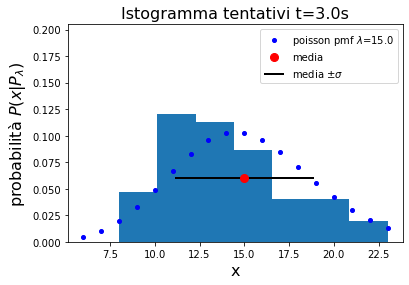

In [8]:
istogrammi_tentativi(R,T3,conteggi_t3,0.06,7)

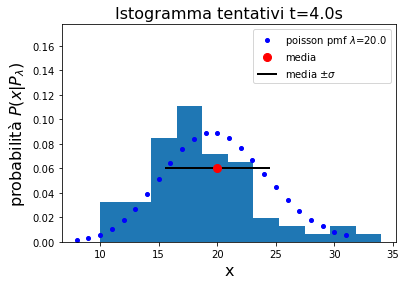

In [9]:
istogrammi_tentativi(R,T4,conteggi_t4,0.06,11)

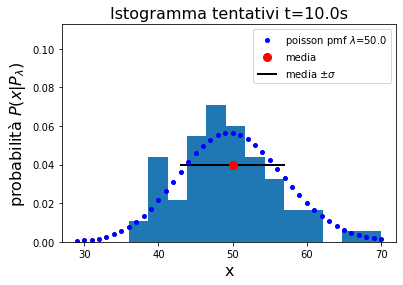

In [10]:
istogrammi_tentativi(R,T5,conteggi_t10,0.04,13)

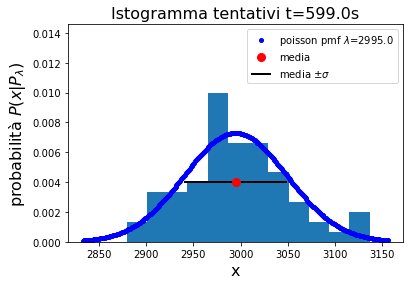

In [11]:
istogrammi_tentativi(R,T6,conteggi_t599,0.004,12)

## inferenza su lamda
prima inferisco e mi trovo la lamda per ogni tempo con la sua incertezza. Per trovare il rate di ogni tempo prendo semplicemente lamda e la divido per t. Per l'inferenza si utilizza la funzione gamma per una combinazione lineare sul numero di conteggi

In [12]:
from scipy.stats import gamma

def inferenza_lamda(conteggi,n_mis,off,T,xlim1,xlim2):
    x=sum(conteggi)
    l = np.linspace(xlim1, xlim2, 300)
    plt.plot(l, gamma.pdf(l, a=x+1, scale=1/n_mis),
             label='$f(\lambda|~\sum x_i=${0:.1f})'.format(x))
    plt.title('Funzione posterior Poissoniana t=={0:.1f}s '.format(T), fontsize=16)
    plt.xlabel('$\lambda$',fontsize=16)
    plt.ylim(0, 1.5*max(gamma.pdf(l, a=x+1, scale=1/n_mis)))
    plt.ylabel('$f(\lambda)$',fontsize=16)
    plt.legend(loc='upper right',fontsize=16)
    mean, var = gamma.stats(a=x+1, scale=1/n_mis, moments='mv')
    sd = np.sqrt(var)
    plt.hlines(off, mean-sd, mean+sd,
               colors='black', lw=2,
               label='$\sigma[\lambda]=${0:.2f}'.format(sd))
    plt.plot(mean, off, 'ro', ms=8,
             label='E[$\lambda$]={0:.2f}'.format(mean))
    plt.legend(loc='upper right',fontsize=11)
    return mean,sd

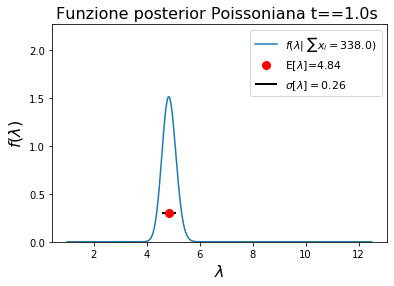

In [13]:
mean1,sd1=inferenza_lamda(conteggi_t1,70,0.3,T1,1,12.5)

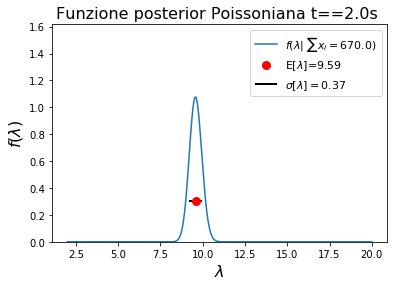

In [14]:
mean2,sd2=inferenza_lamda(conteggi_t2,70,0.3,T2,2,20)

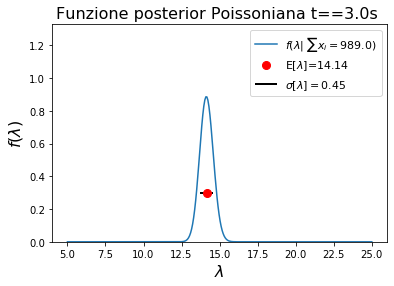

In [15]:
mean3,sd3=inferenza_lamda(conteggi_t3,70,0.3,T3,5,25)

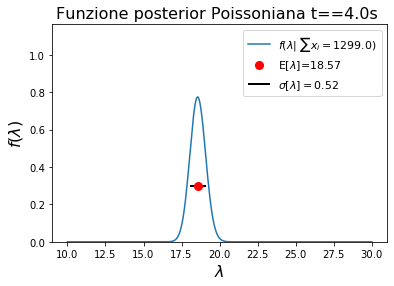

In [16]:
mean4,sd4=inferenza_lamda(conteggi_t4,70,0.3,T4,10,30)

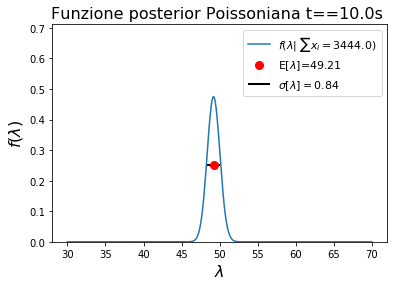

In [17]:
mean5,sd5=inferenza_lamda(conteggi_t10,70,0.25,T5,30,70)

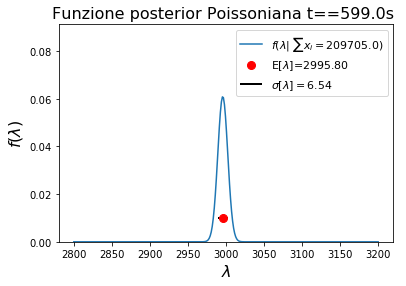

In [18]:
mean6,sd6=inferenza_lamda(conteggi_t599,70,0.01,T6,2800,3200)

per trovare il valore Rbest con relativa incertezza un metodo potrebbe essere la media pesata sui tempi. Non sono sicuro, correggetemi se sbaglio. ATTENZIONE! I DATI SONO QUELLI DEGLI ISTOGRAMMI PASSATI, IN FOTO.

 RT(tot) = R1*T1 + R2*T2 +...+Rn*Tn = lamda1 + ... + lamda.n

In [75]:
conteggi_tot=sum(conteggi_t1)+sum(conteggi_t2)+sum(conteggi_t3)+sum(conteggi_t4)+sum(conteggi_t10)+sum(conteggi_t599)
Ttot=1+2+3+4+10+599
mean, var = gamma.stats(a=conteggi_tot+1, scale=1/70, moments='mv')
mu_Rbest=mean/Ttot
sigma_Rbest = np.sqrt(var)/Ttot

In [76]:
mu_Rbest,sigma_Rbest

(4.995291945534272, 0.010737077630257613)

## verosimiglianza di R per t=1, t=4, t=599 

In [68]:
def inferenza_R(conteggi,n_mis,off,T,xlim1,xlim2):
    x=sum(conteggi)
    R = np.linspace(xlim1, xlim2, 300)
    plt.plot(R, gamma.pdf(R*T, a=x+1, scale=1/n_mis)*T,
             label='f(R|$~\sum x_i$={0:.1f},T)'.format(x))
    plt.title('Funzione verosimiglianza rate t={0:.1f}s '.format(T), fontsize=16)
    plt.xlabel('R',fontsize=16)
    plt.ylim(0, 1.5*max(gamma.pdf(R*T, a=x+1, scale=1/n_mis)*T))
    plt.ylabel('f(R)',fontsize=16)
    plt.legend(loc='upper right',fontsize=16)
    mean, var = gamma.stats(a=x+1, scale=1/n_mis, moments='mv')
    mean=mean/T
    sd = np.sqrt(var)/T
    plt.hlines(off, mean-sd, mean+sd,
               colors='black', lw=2,
               label='sigma[R]={0:.3f}'.format(sd))
    plt.plot(mean, off, 'ro', ms=8,
             label='E[R]={0:.3f}'.format(mean))
    plt.legend(loc='upper right',fontsize=11)
    return mean,sd

(4.8428571428571425, 0.26302789485031386)

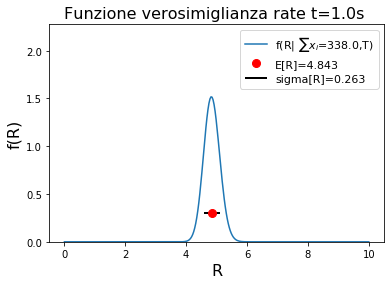

In [69]:
inferenza_R(conteggi_t1,70,0.3,T1,0,10)

(4.642857142857142, 0.12876968840942818)

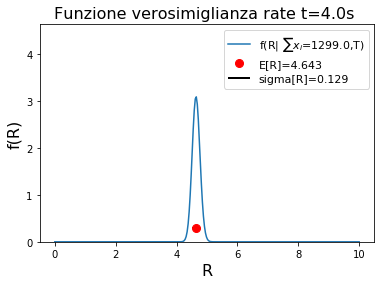

In [70]:
inferenza_R(conteggi_t4,70,0.3,T4,0,10)

(5.001335559265442, 0.010921456638329895)

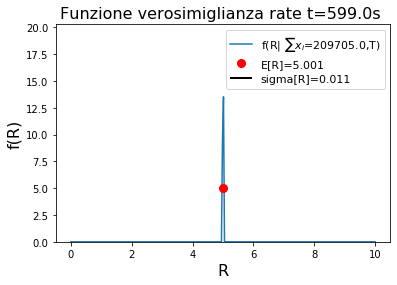

In [71]:
inferenza_R(conteggi_t599,70,5,T6,0,10)

inferenza su R per la combinazione di tutte le misure

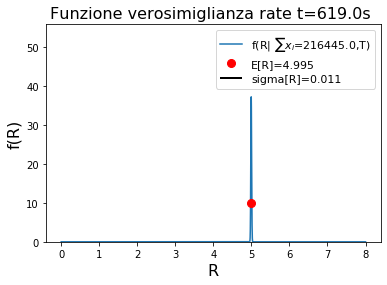

In [99]:
conteggi_tot=sum(conteggi_t1)+sum(conteggi_t2)+sum(conteggi_t3)+sum(conteggi_t4)+sum(conteggi_t10)+sum(conteggi_t599)
Ttot=1+2+3+4+10+599
R=np.linspace(0,8,100000)
y=gamma.pdf(R*Ttot,a=conteggi_tot+1, scale=1/70)*Ttot
plt.plot(R,y,
    label='f(R|$~\sum x_i$={0:.1f},T)'.format(conteggi_tot))
plt.title('Funzione verosimiglianza rate t={0:.1f}s '.format(Ttot), fontsize=16)
plt.xlabel('R',fontsize=16)
plt.ylim(0, 1.5*max(gamma.pdf(R*Ttot, a=conteggi_tot+1, scale=1/70)*Ttot))
plt.ylabel('f(R)',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
mean, var = gamma.stats(a=conteggi_tot+1, scale=1/70, moments='mv')
mean=mean/Ttot
sd = np.sqrt(var)/Ttot
plt.hlines(10, mean-sd, mean+sd,
               colors='black', lw=2,
               label='sigma[R]={0:.3f}'.format(sd))
plt.plot(mean, 10, 'ro', ms=8,
             label='E[R]={0:.3f}'.format(mean))
plt.legend(loc='upper right',fontsize=11)